# Age and Sex analysis

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
#Importing the data:
CSV_PATH = "..\data\clean_data.csv"
N_ROWS = None

df = pd.read_csv(CSV_PATH, nrows=N_ROWS)
df_nerv = df[df["grup ATC nivell 1"] == "SISTEMA NERVIOSO"] 
df.columns.values

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\gerar\AppData\Local\Temp\ipykernel_17532\3579983211.py:2: SyntaxWarning: invalid escape sequence '\d'
  CSV_PATH = "..\data\clean_data.csv"


array(['any', 'mes', 'codi de la regió sanitària', 'regió sanitària',
       "grup d'edat", 'sexe', 'codi del grup ATC nivell 1',
       'grup ATC nivell 1', 'codi del grup ATC nivell 2',
       'grup ATC nivell 2', 'codi del grup ATC nivell 3',
       'grup ATC nivell 3', 'codi del grup ATC nivell 4',
       'grup ATC nivell 4', 'nombre de receptes', "nombre d'envasos",
       'import íntegre', 'import aportació CatSalut'], dtype=object)

In [69]:
df["nombre de receptes"].unique()


array([    3,     1,    17, ..., 25639, 59063, 24202], dtype=int64)

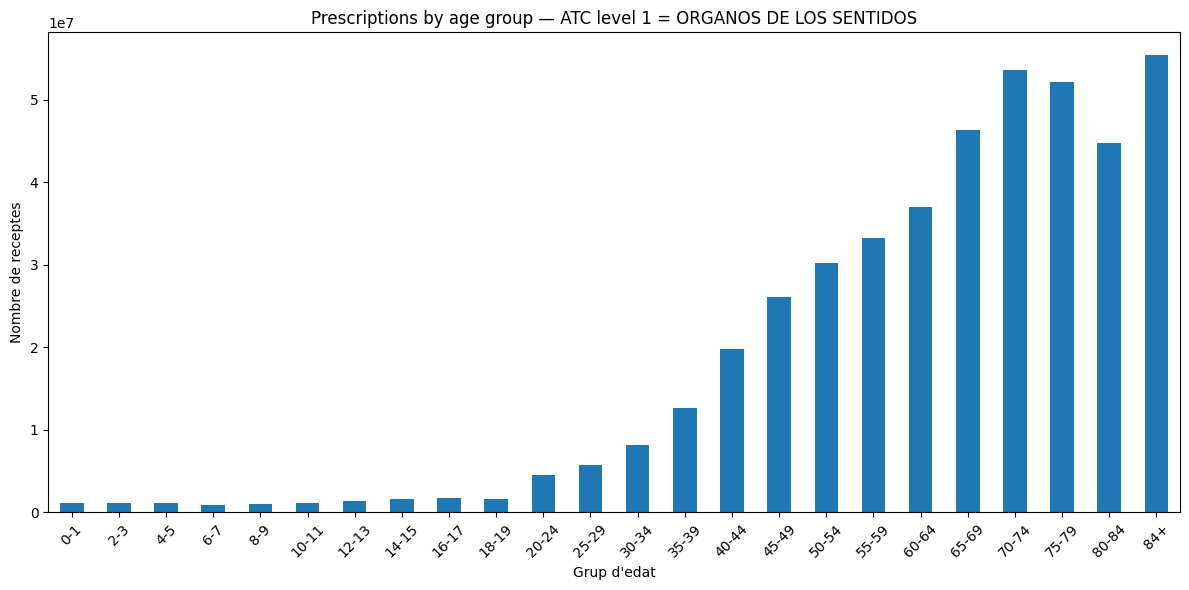

In [71]:
outdir = Path("../plots/age_and_sex/atc_1")
outdir.mkdir(parents=True, exist_ok=True)


# --- define the correct age order ---
age_order = [
        "0-1", "2-3", "4-5", "6-7", "8-9",
        "10-11", "12-13", "14-15", "16-17", "18-19",
        "20-24", "25-29", "30-34", "35-39", "40-44",
        "45-49", "50-54", "55-59", "60-64", "65-69",
        "70-74", "75-79", "80-84", "84+"
    ]

for selected_atc in df["grup ATC nivell 1"].unique():   
    
    tmp = (
        df[df["grup ATC nivell 1"] == selected_atc]
        .groupby("grup d'edat")["nombre de receptes"]
        .sum()
        .reindex(age_order)        # enforce correct order
    )
    
    tmp.plot(kind="bar", figsize=(12,6))
    
    plt.xlabel("Grup d'edat")
    plt.ylabel("Nombre de receptes")
    plt.title(f"Prescriptions by age group — ATC level 1 = {selected_atc}")
    plt.xticks(rotation=45)
    plt.tight_layout()

    path = "../plots/age_and_sex/atc_1/age_atc1_{}.pdf".format(selected_atc.replace(" ", "_"))
    plt.savefig(path)

# ATC 2

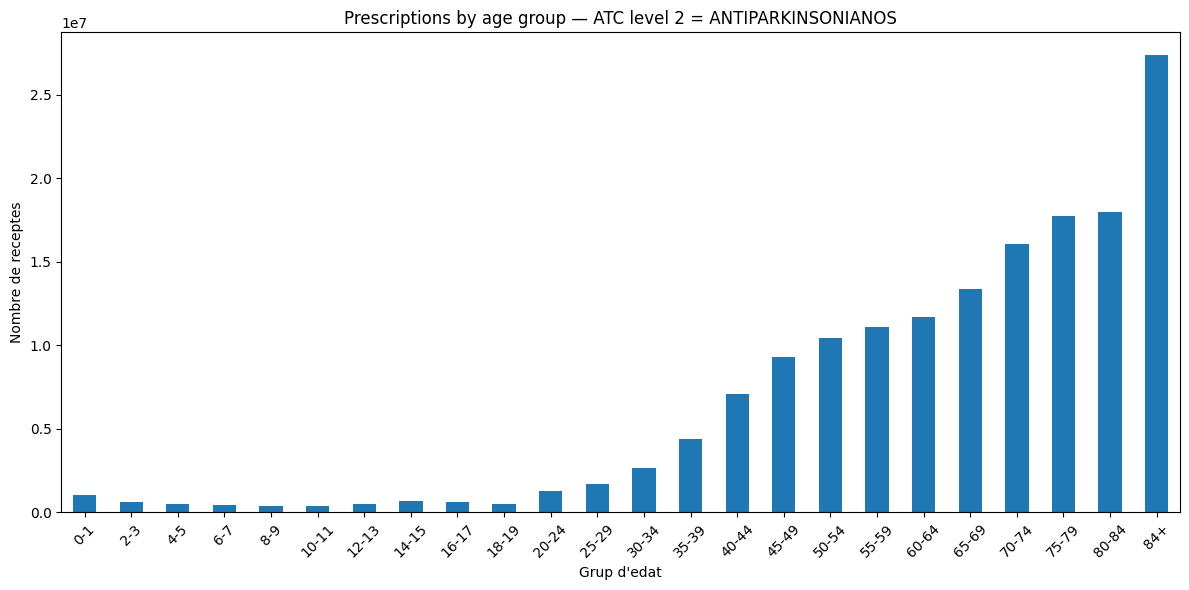

In [75]:
outdir = Path("../plots/age_and_sex/atc_2_nervous/")
outdir.mkdir(parents=True, exist_ok=True)

df_atc_2 = df[df["grup ATC nivell 1"] == "SISTEMA NERVIOSO"]

for selected_atc_2 in df_atc_2["grup ATC nivell 2"].unique():   
    
    tmp = (
        df_atc_2[df_atc_2["grup ATC nivell 2"] == selected_atc_2]
        .groupby("grup d'edat")["nombre de receptes"]
        .sum()
        .reindex(age_order)        # enforce correct order
    )
    
    tmp.plot(kind="bar", figsize=(12,6))
    
    plt.xlabel("Grup d'edat")
    plt.ylabel("Nombre de receptes")
    plt.title(f"Prescriptions by age group — ATC level 2 = {selected_atc_2}")
    plt.xticks(rotation=45)
    plt.tight_layout()

    path = "../plots/age_and_sex/atc_2_nervous/age_nervous_atc2_{}.pdf".format(selected_atc_2.replace(" ", "_"))
    plt.savefig(path)

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# ensure output dir exists
outdir = Path("../plots/age_and_sex/atc_1_stacked")
outdir.mkdir(parents=True, exist_ok=True)

# Your ordered age categories
age_order = [
    "0-1", "2-3", "4-5", "6-7", "8-9",
    "10-11", "12-13", "14-15", "16-17", "18-19",
    "20-24", "25-29", "30-34", "35-39", "40-44",
    "45-49", "50-54", "55-59", "60-64", "65-69",
    "70-74", "75-79", "80-84", "84+"
]

for atc1 in df["grup ATC nivell 1"].unique():
    
    # --- filter to this ATC1 ---
    df_atc = df[df["grup ATC nivell 1"] == atc1]

    # --- group by age × sex ---
    grouped = (
        df_atc.groupby(["grup d'edat", "sexe"])["nombre de receptes"]
              .sum()
              .unstack(fill_value=0)
    )

    # reorder age axis
    grouped = grouped.reindex(age_order)

    # ensure both columns exist
    for col in ["Home", "Dona"]:
        if col not in grouped.columns:
            grouped[col] = 0

    # convert to proportions per age group
    grouped_norm = grouped.div(grouped.sum(axis=1).replace(0, 1), axis=0)

    # --- plot stacked vertical bars ---
    plt.figure(figsize=(12, 6))

    plt.bar(
        grouped_norm.index,
        grouped_norm["Home"],
        label="Homes",
        color="steelblue"
    )

    plt.bar(
        grouped_norm.index,
        grouped_norm["Dona"],
        bottom=grouped_norm["Home"],
        label="Dones",
        color="salmon"
    )

    plt.ylabel("Proporció de receptes")
    plt.xlabel("Grup d'edat")
    plt.xticks(rotation=45)
    plt.title(f"Distribució d'edat i sexe — ATC nivell 1 = {atc1}")

    plt.legend()
    plt.tight_layout()

    # --- save ---
    safe_name = atc1.replace(" ", "_")
    outfile = outdir / f"stacked_atc1_{safe_name}.pdf"
    plt.savefig(outfile)
    plt.close()


In [77]:
df_nerv = df[df["grup ATC nivell 1"] == "SISTEMA NERVIOSO"] 

# ensure output dir exists
outdir = Path("../plots/age_and_sex/atc_2_stacked")
outdir.mkdir(parents=True, exist_ok=True)


for atc2 in df_nerv["grup ATC nivell 2"].unique():
    
    # --- filter to this ATC1 ---
    df_atc = df_nerv[df_nerv["grup ATC nivell 2"] == atc2]

    # --- group by age × sex ---
    grouped = (
        df_atc.groupby(["grup d'edat", "sexe"])["nombre de receptes"]
              .sum()
              .unstack(fill_value=0)
    )

    # reorder age axis
    grouped = grouped.reindex(age_order)

    # ensure both columns exist
    for col in ["Home", "Dona"]:
        if col not in grouped.columns:
            grouped[col] = 0

    # convert to proportions per age group
    grouped_norm = grouped.div(grouped.sum(axis=1).replace(0, 1), axis=0)

    # --- plot stacked vertical bars ---
    plt.figure(figsize=(12, 6))

    plt.bar(
        grouped_norm.index,
        grouped_norm["Home"],
        label="Homes",
        color="steelblue"
    )

    plt.bar(
        grouped_norm.index,
        grouped_norm["Dona"],
        bottom=grouped_norm["Home"],
        label="Dones",
        color="salmon"
    )

    plt.ylabel("Proporció de receptes")
    plt.xlabel("Grup d'edat")
    plt.xticks(rotation=45)
    plt.title(f"Distribució d'edat i sexe — ATC nivell 2 = {atc2}")

    plt.legend()
    plt.tight_layout()

    # --- save ---
    safe_name = atc2.replace(" ", "_")
    outfile = outdir / f"stacked_atc2_{safe_name}.pdf"
    plt.savefig(outfile)
    plt.close()


In [78]:
# ensure output dir exists
outdir = Path("../plots/age_and_sex/atc_3_stacked")
outdir.mkdir(parents=True, exist_ok=True)


for atc3 in df_nerv["grup ATC nivell 3"].unique():
    
    # --- filter to this ATC1 ---
    df_atc = df_nerv[df_nerv["grup ATC nivell 3"] == atc3]

    # --- group by age × sex ---
    grouped = (
        df_atc.groupby(["grup d'edat", "sexe"])["nombre de receptes"]
              .sum()
              .unstack(fill_value=0)
    )

    # reorder age axis
    grouped = grouped.reindex(age_order)

    # ensure both columns exist
    for col in ["Home", "Dona"]:
        if col not in grouped.columns:
            grouped[col] = 0

    # convert to proportions per age group
    grouped_norm = grouped.div(grouped.sum(axis=1).replace(0, 1), axis=0)

    # --- plot stacked vertical bars ---
    plt.figure(figsize=(12, 6))

    plt.bar(
        grouped_norm.index,
        grouped_norm["Home"],
        label="Homes",
        color="steelblue"
    )

    plt.bar(
        grouped_norm.index,
        grouped_norm["Dona"],
        bottom=grouped_norm["Home"],
        label="Dones",
        color="salmon"
    )

    plt.ylabel("Proporció de receptes")
    plt.xlabel("Grup d'edat")
    plt.xticks(rotation=45)
    plt.title(f"Distribució d'edat i sexe — ATC nivell 2 = {atc3}")

    plt.legend()
    plt.tight_layout()

    # --- save ---
    safe_name = atc3.replace(" ", "_")
    outfile = outdir / f"stacked_atc3_{safe_name}.pdf"
    plt.savefig(outfile)
    plt.close()

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

outdir = Path("../plots/age_and_sex/atc_1_continuous")
outdir.mkdir(parents=True, exist_ok=True)


for atc1 in df["grup ATC nivell 1"].unique():
    
    # Filter
    df_atc = df[df["grup ATC nivell 1"] == atc1]

    # Group
    grouped = (
        df_atc.groupby(["grup d'edat", "sexe"])["nombre de receptes"]
              .sum()
              .unstack(fill_value=0)
              .reindex(age_order)
    )

    for col in ["Home", "Dona"]:
        if col not in grouped.columns:
            grouped[col] = 0

    # Proportions
    total_per_age = grouped.sum(axis=1)
    grouped_norm = grouped.div(total_per_age.replace(0, 1), axis=0)

    # Numerical x for continuous plot
    x = np.arange(len(age_order))

    # Continuous stacked area
    male_area = grouped_norm["Home"].values
    female_area = grouped_norm["Dona"].values

    # Dynamic alpha (volume → opacity)
    # normalise counts 0..1
    # log-scaled alpha
    vol = total_per_age.replace(0, 1)
    log_vol = np.log1p(vol)
    alpha_levels = (log_vol - log_vol.min()) / (log_vol.max() - log_vol.min() + 1e-9)
    
    # enforce minimum opacity
    alpha_levels = 0.3 + 0.7 * alpha_levels


    # Base colors
    male_color = np.array([70/255, 130/255, 180/255])     # steelblue
    female_color = np.array([250/255, 128/255, 114/255])  # salmon

    # Create figure
    plt.figure(figsize=(12, 6))

    # For each age group, draw a quad with interpolated alpha
    for i in range(len(x)-1):
        plt.fill_between(
            [x[i], x[i+1]],
            [0, 0],
            [male_area[i], male_area[i+1]],
            color=male_color,
            alpha=float(alpha_levels[i])
        )
        plt.fill_between(
            [x[i], x[i+1]],
            [male_area[i], male_area[i+1]],
            [male_area[i]+female_area[i], male_area[i+1]+female_area[i+1]],
            color=female_color,
            alpha=float(alpha_levels[i])
        )

    # Axis labels
    plt.xticks(x, age_order, rotation=45)
    plt.ylabel("Proporció (Homes + Dones)")
    plt.xlabel("Grup d'edat")
    plt.title(f"Distribució d'edat i sexe (continu) — ATC nivell 1 = {atc1}")

    # Legend patches
    plt.scatter([], [], color=male_color, label="Homes")
    plt.scatter([], [], color=female_color, label="Dones")
    plt.legend()

    plt.tight_layout()

    # Save
    safe_name = atc1.replace(" ", "_")
    outfile = outdir / f"continuous_stacked_atc1_{safe_name}.pdf"
    plt.savefig(outfile)
    plt.close()


C:\Users\gerar\AppData\Local\Temp\ipykernel_17532\2048694126.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha=float(alpha_levels[i])
C:\Users\gerar\AppData\Local\Temp\ipykernel_17532\2048694126.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha=float(alpha_levels[i])
C:\Users\gerar\AppData\Local\Temp\ipykernel_17532\2048694126.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha=float(alpha_levels[i])
C:\User

# Ridgeline

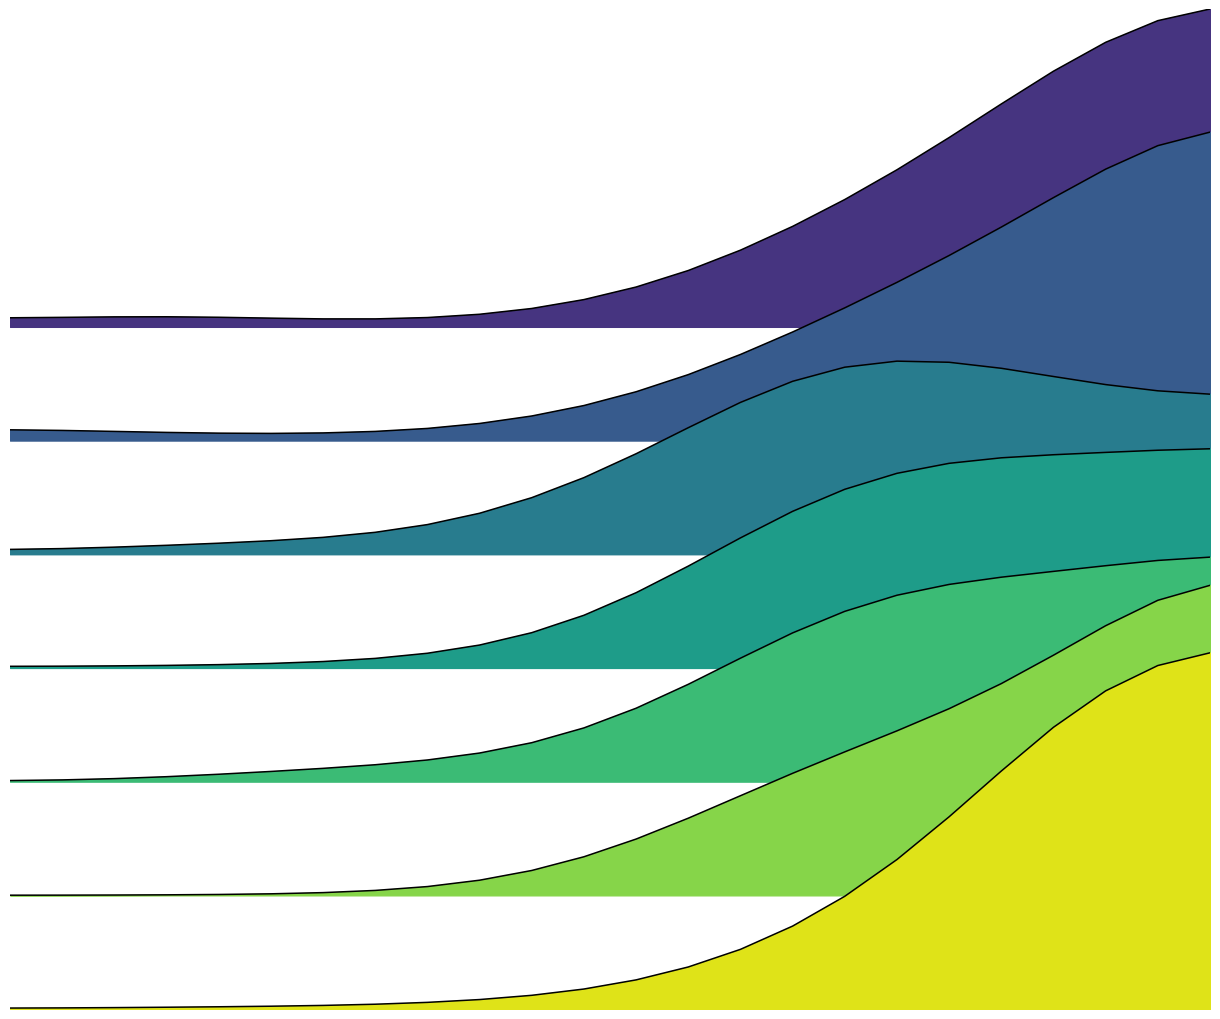

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import matplotlib.cm as cm


atc2_values = df_nerv["grup ATC nivell 2"].unique()
n_atc = len(atc2_values)

ridge_scale = 10
offset = -0.5  

# ---- FIGURE ----
fig, ax = plt.subplots(figsize=(12, 10))

# color palette
colors = cm.viridis(np.linspace(0.15, 0.95, n_atc))

for i, (atc2, color) in enumerate(zip(atc2_values, colors)):

    tmp = (
        df_nerv[df_nerv["grup ATC nivell 2"] == atc2]
        .groupby("grup d'edat")["nombre de receptes"]
        .sum()
        .reindex(age_order)
        .fillna(0)
    )

    y = tmp / tmp.sum() if tmp.sum() > 0 else tmp
    y = y.values

    y_smooth = gaussian_filter1d(y, sigma=2)
    y_smooth = gaussian_filter1d(y_smooth, sigma=1.2)
    y_scaled = y_smooth * ridge_scale

    baseline = i * offset

    ax.fill_between(
        np.arange(len(age_order)),
        baseline,
        baseline + y_scaled,
        color=color,
        alpha=1
    )

    ax.plot(
        np.arange(len(age_order)),
        baseline + y_scaled,
        color="black",
        linewidth=1.1
    )

# ---- REMOVE ALL AXES, SPINES, TICKS ----
ax.set_xticks([])
ax.set_yticks([])

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_frame_on(False)

# remove margins so the plot fills entire canvas
plt.margins(0, 0)

# turn off axis completely (optional but cleanest)
ax.axis("off")

plt.subplots_adjust(
    left=0, right=1, top=1, bottom=0,
    wspace=0, hspace=0
)

plt.savefig("../plots/age_and_sex/ridgeline_atc2.pdf", dpi=300, bbox_inches="tight", pad_inches=0)
plt.show()


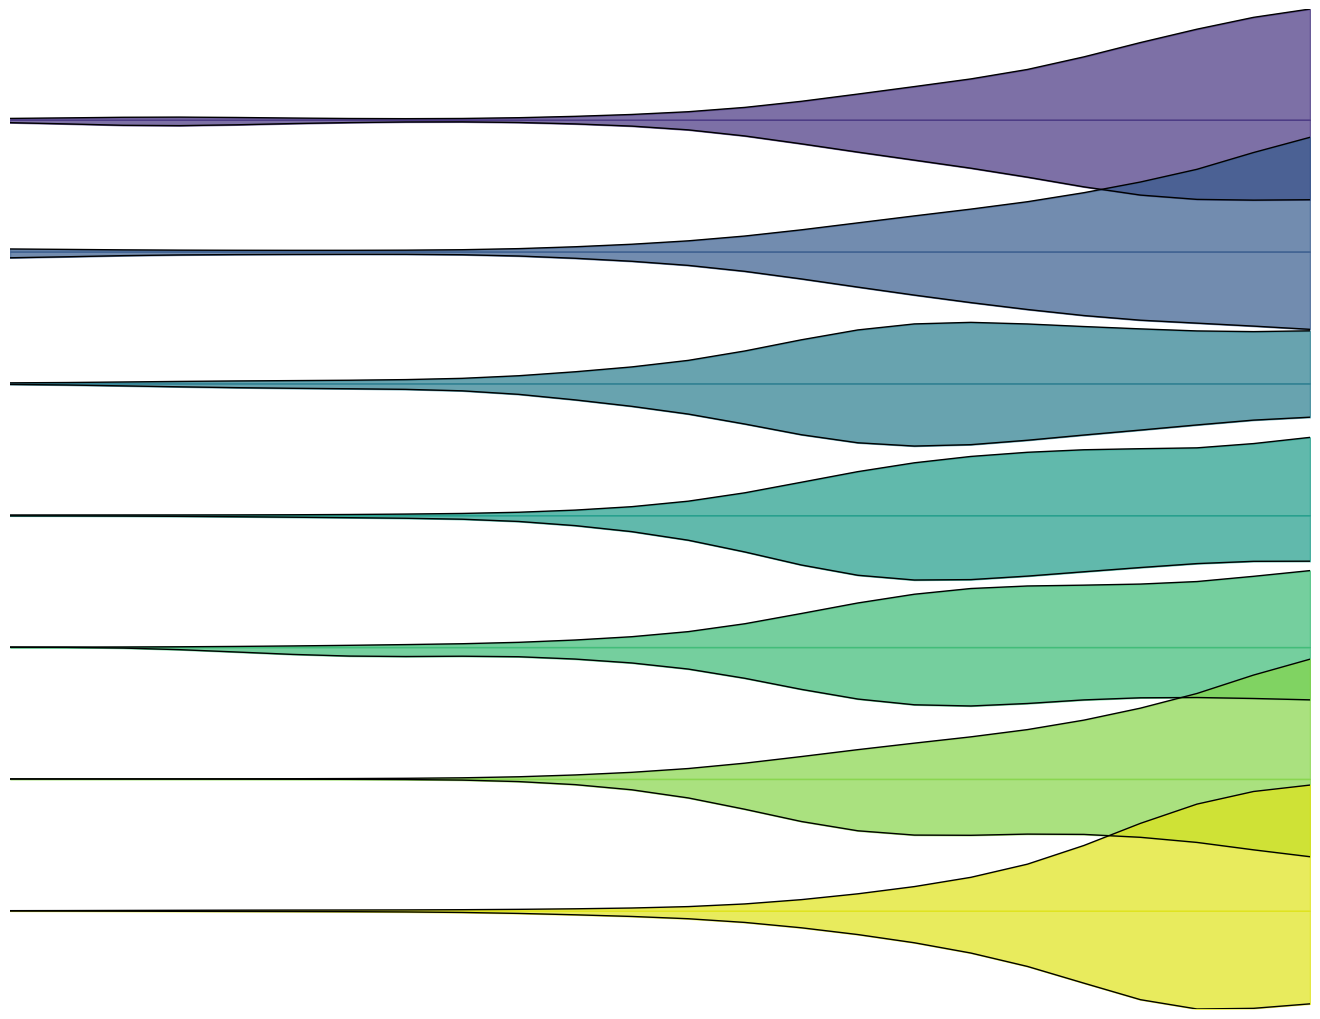

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import matplotlib.cm as cm

# ORDER your age categories
age_order = [
    "0-1", "2-3", "4-5", "6-7", "8-9",
    "10-11", "12-13", "14-15", "16-17", "18-19",
    "20-24", "25-29", "30-34", "35-39", "40-44",
    "45-49", "50-54", "55-59", "60-64", "65-69",
    "70-74", "75-79", "80-84", "84+"
]

atc2_values = df_nerv["grup ATC nivell 2"].unique()
n_atc = len(atc2_values)

ridge_scale = 10
offset = -2  

# FIGURE
fig, ax = plt.subplots(figsize=(13, 10))

# color palette for categories
colors = cm.viridis(np.linspace(0.15, 0.95, n_atc))

for i, (atc2, color) in enumerate(zip(atc2_values, colors)):

    df_atc = df_nerv[df_nerv["grup ATC nivell 2"] == atc2]

    # group by age × sex
    grouped = (
        df_atc
        .groupby(["grup d'edat", "sexe"])["nombre de receptes"]
        .sum()
        .unstack(fill_value=0)
        .reindex(age_order)
        .fillna(0)
    )

    # ensure both columns exist
    for col in ["Home", "Dona"]:
        if col not in grouped.columns:
            grouped[col] = 0

    # proportions
    male = grouped["Home"].values
    female = grouped["Dona"].values

    male = male / male.sum() if male.sum()>0 else male
    female = female / female.sum() if female.sum()>0 else female

    # smooth
    male_smooth   = gaussian_filter1d(male,   sigma=1.2) * ridge_scale
    female_smooth = gaussian_filter1d(female, sigma=1.2) * ridge_scale

    baseline = i * offset
    x = np.arange(len(age_order))

    # --- mirror plot ---
    ax.fill_between(
        x, baseline, baseline - male_smooth,
        color=color, alpha=0.7
    )
    ax.plot(
        x, baseline - male_smooth,
        color="black", linewidth=1.0
    )

    ax.fill_between(
        x, baseline, baseline + female_smooth,
        color=color, alpha=0.7
    )
    ax.plot(
        x, baseline + female_smooth,
        color="black", linewidth=1.0
    )

# --- Remove everything for canvas aesthetics ---
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)
ax.axis("off")
plt.margins(0, 0)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.savefig("../plots/age_and_sex/ridgeline_mf_split.pdf", dpi=300, bbox_inches="tight", pad_inches=0)
plt.show()


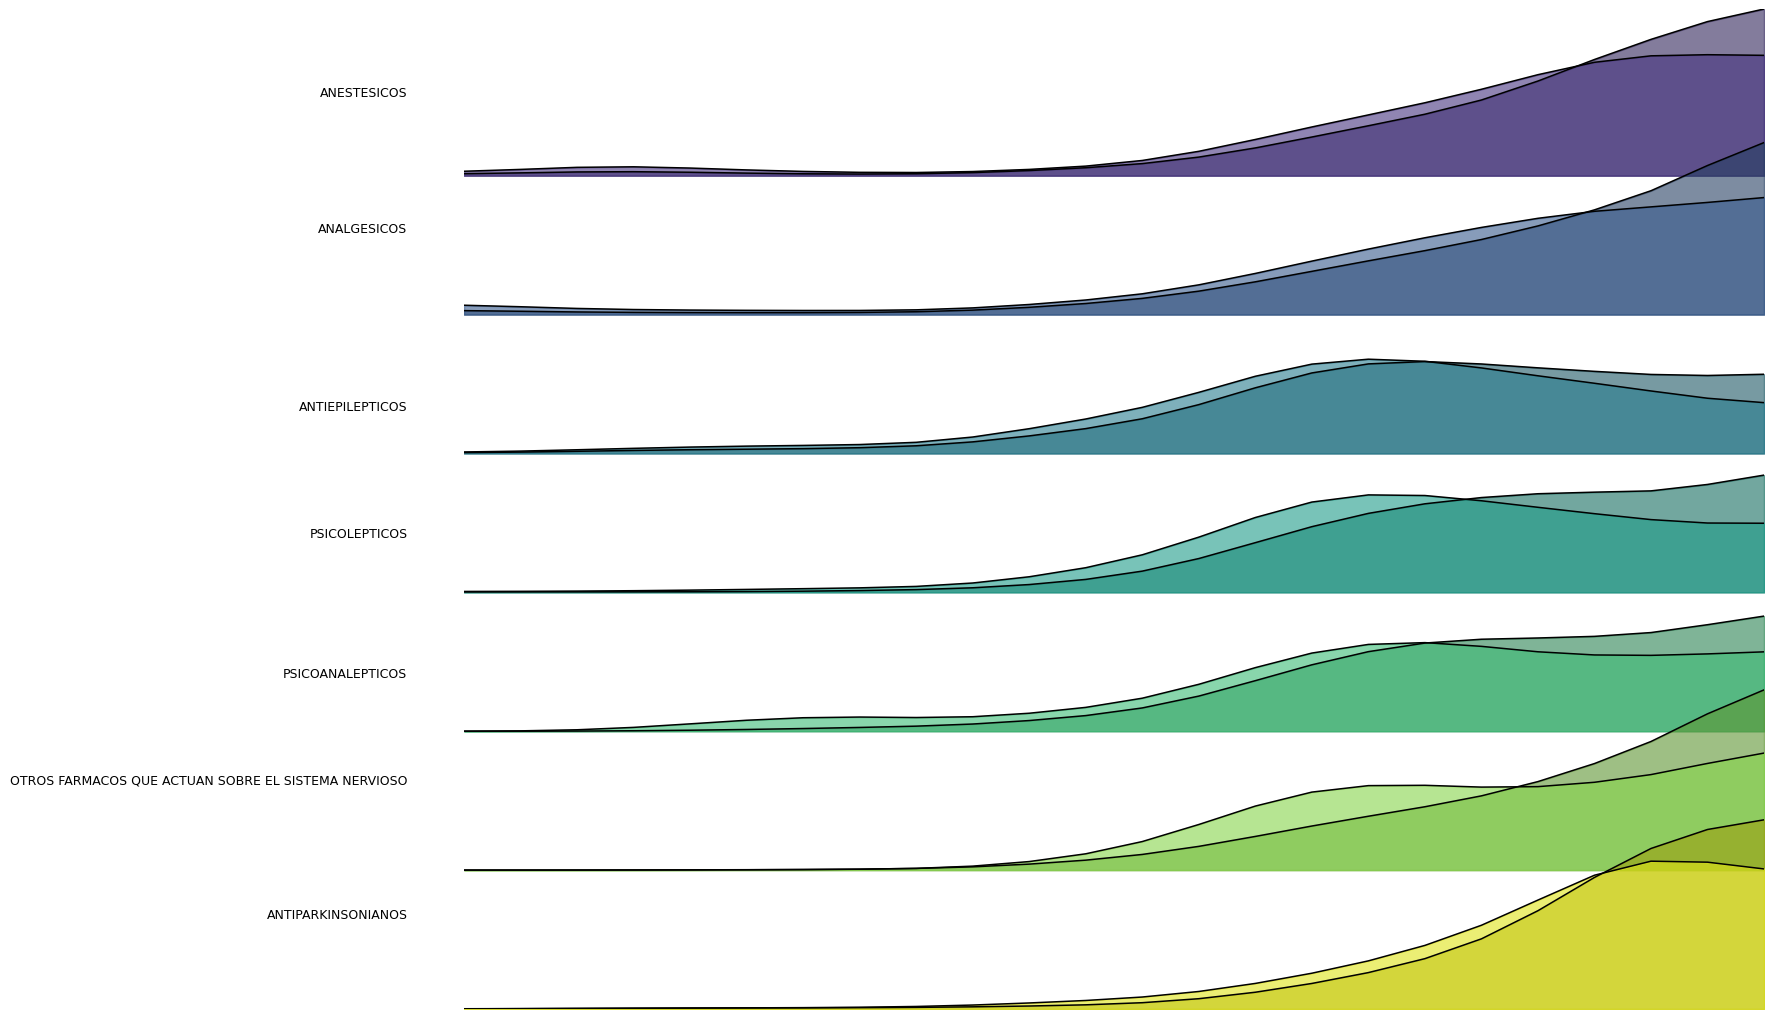

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import matplotlib.cm as cm

# ORDER your age categories
age_order = [
    "0-1", "2-3", "4-5", "6-7", "8-9",
    "10-11", "12-13", "14-15", "16-17", "18-19",
    "20-24", "25-29", "30-34", "35-39", "40-44",
    "45-49", "50-54", "55-59", "60-64", "65-69",
    "70-74", "75-79", "80-84", "84+"
]

atc2_values = df_nerv["grup ATC nivell 2"].unique()
n_atc = len(atc2_values)

# smoothness & vertical scaling
ridge_scale = 10
offset = -1.4

fig, ax = plt.subplots(figsize=(13, 10))

# color palette for ATC categories (base color)
base_colors = cm.viridis(np.linspace(0.15, 0.95, n_atc))

for i, (atc2, base_color) in enumerate(zip(atc2_values, base_colors)):

    df_atc = df_nerv[df_nerv["grup ATC nivell 2"] == atc2]

    # group by age × sex
    grouped = (
        df_atc.groupby(["grup d'edat", "sexe"])["nombre de receptes"]
              .sum()
              .unstack(fill_value=0)
              .reindex(age_order)
              .fillna(0)
    )

    # Ensure both sexes exist
    for col in ["Home", "Dona"]:
        if col not in grouped.columns:
            grouped[col] = 0

    male = grouped["Home"].values
    female = grouped["Dona"].values

    # proportions
    male = male / male.sum() if male.sum() > 0 else male
    female = female / female.sum() if female.sum() > 0 else female

    # smoothing
    male_s = gaussian_filter1d(male, sigma=1.2) * ridge_scale
    female_s = gaussian_filter1d(female, sigma=1.2) * ridge_scale

    baseline = i * offset
    x = np.arange(len(age_order))

    # create slightly different color shades
    male_color   = base_color
    female_color = tuple(np.clip(np.array(base_color) * 0.7, 0, 1))  # darker shade

    # --- FEMALE ridge ---
    ax.fill_between(x, baseline, baseline + female_s,
                    color=female_color, alpha=0.6)
    ax.plot(x, baseline + female_s, color="black", linewidth=1.1)

    # --- MALE ridge ---
    ax.fill_between(x, baseline, baseline + male_s,
                    color=male_color, alpha=0.6)
    ax.plot(x, baseline + male_s, color="black", linewidth=1.1)

    # optional labels
    ax.text(-1, baseline + max(male_s.max(), female_s.max()) * 0.5,
            atc2, ha="right", va="center", fontsize=9)

# --- Minimalist ridgeline look ---
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)
ax.axis("off")

plt.margins(0, 0)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.savefig("../plots/age_and_sex/ridgeline_overlay_mf.pdf",
            dpi=300, bbox_inches="tight", pad_inches=0)
plt.show()


# Time series

In [83]:
age_map = {
    "0-1": "0-9", "2-3": "0-9", "4-5": "0-9", "6-7": "0-9", "8-9": "0-9",

    "10-11": "10-19", "12-13": "10-19", "14-15": "10-19",
    "16-17": "10-19", "18-19": "10-19",

    "20-24": "20-39", "25-29": "20-39", "30-34": "20-39",
    "35-39": "20-39",

    "40-44": "40-59", "45-49": "40-59", "50-54": "40-59",
    "55-59": "40-59",

    "60-64": "60-74", "65-69": "60-74", "70-74": "60-74",

    "75-79": "75+", "80-84": "75+", "84+": "75+"
}

macro_order = ["0-9", "10-19", "20-39", "40-59", "60-74", "75+"]

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ---- OUTPUT DIRECTORY ----
outdir = Path("../plots/age_and_sex/time_age_stacked_atc1")
outdir.mkdir(parents=True, exist_ok=True)


# ---- NEW COLUMN: MACRO AGE ----
df["macro_age"] = df["grup d'edat"].map(age_map)

# ---- NEW COLUMN: DATETIME (year + month) ----
df["date"] = pd.to_datetime(df["any"].astype(str) + "-" + df["mes"].astype(str))

# ---- LOOP OVER ATC1 GROUPS ----
for atc1 in df["grup ATC nivell 1"].unique():

    df_atc = df[df["grup ATC nivell 1"] == atc1]

    # group by time × macro age
    grouped = (
        df_atc
        .groupby(["date", "macro_age"])["nombre de receptes"]
        .sum()
        .unstack(fill_value=0)
        .reindex(columns=macro_order)
    )

    # ---- PLOT ----
    plt.figure(figsize=(12, 7))

    plt.stackplot(
        grouped.index,
        [grouped[col].values for col in macro_order],
        labels=macro_order,
        alpha=0.9
    )

    plt.legend(loc="upper left")
    plt.title(f"Evolució temporal de receptes per grup d’edat — ATC1 = {atc1}")
    plt.xlabel("Data")
    plt.ylabel("Nombre de receptes")

    plt.tight_layout()

    # ---- SAVE ----
    safe_name = atc1.replace(" ", "_")
    outfile = outdir / f"timeseries_stacked_{safe_name}.pdf"
    plt.savefig(outfile)
    plt.close()


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ---- OUTPUT DIRECTORY ----
outdir = Path("../plots/age_and_sex/time_age_stacked_atc2")
outdir.mkdir(parents=True, exist_ok=True)


# ---- NEW COLUMN: MACRO AGE ----
df_nerv["macro_age"] = df_nerv["grup d'edat"].map(age_map)

# ---- NEW COLUMN: DATETIME (year + month) ----
df_nerv["date"] = pd.to_datetime(df_nerv["any"].astype(str) + "-" + df_nerv["mes"].astype(str))

# ---- LOOP OVER ATC1 GROUPS ----
for atc2 in df_nerv["grup ATC nivell 2"].unique():

    df_atc = df_nerv[df_nerv["grup ATC nivell 2"] == atc2]

    # group by time × macro age
    grouped = (
        df_atc
        .groupby(["date", "macro_age"])["nombre de receptes"]
        .sum()
        .unstack(fill_value=0)
        .reindex(columns=macro_order)
    )

    # ---- PLOT ----
    plt.figure(figsize=(12, 7))

    plt.stackplot(
        grouped.index,
        [grouped[col].values for col in macro_order],
        labels=macro_order,
        alpha=0.9
    )

    plt.legend(loc="upper left")
    plt.title(f"Evolució temporal de receptes per grup d’edat — ATC2 = {atc2}")
    plt.xlabel("Data")
    plt.ylabel("Nombre de receptes")

    plt.tight_layout()

    # ---- SAVE ----
    safe_name = atc2.replace(" ", "_")
    outfile = outdir / f"timeseries_stacked_{safe_name}.pdf"
    plt.savefig(outfile)
    plt.close()


C:\Users\gerar\AppData\Local\Temp\ipykernel_17532\947455893.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nerv["macro_age"] = df_nerv["grup d'edat"].map(age_map)
C:\Users\gerar\AppData\Local\Temp\ipykernel_17532\947455893.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nerv["date"] = pd.to_datetime(df_nerv["any"].astype(str) + "-" + df_nerv["mes"].astype(str))


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

outdir = Path("../plots/age_and_sex/monthly_atc1")
outdir.mkdir(parents=True, exist_ok=True)

# ---- Ensure Month Column Exists ----
# Already exists as `mes`, just enforce numeric month
df["mes"] = df["mes"].astype(int)

# List of ATC1 groups
atc1_groups = df["grup ATC nivell 1"].unique()

for atc1 in atc1_groups:

    safe_name = str(atc1).replace(" ", "_").replace("/", "-")

    # ---- FILTER ----
    sub = df[df["grup ATC nivell 1"] == atc1]

    # ---- GROUP BY MONTH-OF-YEAR ----
    monthly = (
        sub.groupby("mes")["nombre de receptes"]
           .sum()
           .reindex(range(1,13), fill_value=0)
    )

    # ---- PLOT ----
    plt.figure(figsize=(10,4))
    plt.plot(monthly.index, monthly.values, marker="o")
    plt.xticks(range(1,13))
    plt.title(f"Seasonality (Month-of-Year) — ATC1 = {atc1}")
    plt.xlabel("Month")
    plt.ylabel("Total Prescriptions")
    plt.tight_layout()

    # ---- SAVE ----
    outfile = outdir / f"monthly_{safe_name}.pdf"
    plt.savefig(outfile)
    plt.close()
